# <font color=darkblue>CE 4363/5363 Groundwater Hydrology <br> Spring 2023 Exercise Set 2</font>

**LAST NAME, FIRST NAME**

**R00000000**

<hr>

### Purpose : 
Reinforce principles of groundwater flow; apply to quantitative cases
 
### Assessment Criteria : 
Completion, results plausible, format correct, example calculations shown.  
<hr>

# Exercise 2-1 (*Problem 4.6 pp. 148*)
The liquid pressure in the screen of a piezometer in a saline aquifer is $7.688 \times 10^{5} N/m^2$.  The liquid density is 1055 kg/m$^3$ and the temperature is 14$^o$C.  The elevation of the piezometer is 45.9 m above MSL.

Determine:
1. The point-water pressure head.
2. The fresh-water pressure head.
3. The total fresh-water head.
<hr>

Solution:

![](freshwaterhead.png)


In [100]:
# Point water pressure head
p = 7.688e05 #Pa given
rho = 1055 #kg/m^3 given
g = 9.81 #m/s/s
def headp(pressure,rho,gee):
    headp=pressure/(rho*gee)
    return(headp)
hp=headp(p,rho,g)
print("Point pressure head: ",round(hp,3)," meters")

Point pressure head:  74.283  meters


In [101]:
# Fresh water pressure head
rho_f = 999 # see table lookup next problem, should be at 14C
hpf = hp*rho/rho_f
print("Equivalent fresh water pressure head: ",round(hpf,3)," meters")

Equivalent fresh water pressure head:  78.447  meters


In [102]:
# Total fresh water pressure head
zwell = 45.9
hp_total = hpf+zwell
print("Total fresh water pressure head: ",round(hp_total,3)," meters")

Total fresh water pressure head:  124.347  meters


# Exercise 2-2 (*Problem 4.8 pp. 148*)
An aquifer has a hydraulic conductivity of 12 ft/day and an effective porosity of 0.17 and is under a hydraulic gradient of 0.0055.  The water temperature is 14$^o$C and the mean pore diameter is 0.33 mm.

Determine:
1. The specific discharge.
2. The average linear velocity.
3. If Darcy's law is applicable under these conditions; justify your answer.

<hr>

Solution:

2-2(1)<br>

$q = K \frac{dh}{dl}$

In [103]:
K = 12 #ft/day
dhdl = 0.0055 #given
q = K*dhdl
print("Specific discharge: ",q," ft/day")

Specific discharge:  0.066  ft/day


2-2(2)

$v = \frac{q}{n}$

In [104]:
n_e = 0.17 #given
v = q/n_e
print("Average linear velocity: ",round(v,3)," ft/day")

Average linear velocity:  0.388  ft/day


2-2(3)

Is Darcy's law applicable? <br>

Evaluate value of Reynolds' number, Re > 10 is usual rule for invalidity (our book suggests Re > 1 is the magic value) either way we have to evaluate Re.

$Re_d = \frac{\rho q d_{10}}{\mu}$ (Eq 4.20 in the book)

Both $\rho$ and $\mu$ are temperature dependent so need to look up values

![](fluidproperties2-2.png)

In [105]:
rho = 999 #kg/m^3
mu = 0.00114 #N-s/m^s
D_10 = 0.33e-03 # 0.33mm into meters
q_si = q*(1/3.28)*(1/86400)  #ft/day * (1m/3.28ft)*(1day/86400sec)
Re_d = (rho * q_si * D_10)/(mu)
print("Reynolds Number: ",round(Re_d,6)," ")

Reynolds Number:  6.7e-05  


$Re_d$ is less than 10 or 1, so Darcy's law valid.

# Exercise 2-3 (*Problem 4.10 pp. 148*)

A confined aquifer is 18 m thick. The potentiometric surface drops 1.99 m between two wells that are 823 m apart. The hydraulic conductivity of the aquifer is 4.35 m/day 

Determine:
1. Discharge per unit width in the aquifer in cubic meters per day

<hr>

Solution:

![](flowbetweenwells.png)

$\frac{Q}{w} = \frac{1}{w} K b w \frac{dh}{dl}$

In [106]:
K = 4.35 #m/day given
b = 18 #m given
w = 1 #m given "unit width"
dh = 1.99 #m given
dl = 823 #m given
Q = K*b*w*(dh/dl)
print("Discharge per unit width: ",round(Q/w,3)," m^2/day")

Discharge per unit width:  0.189  m^2/day


# Exercise 2-4 (*Problem 4.13 pp. 149*)

In the figure below (Fig. 4.19) the hydraulic conductivity of the aquifer is 14.5 m/day. The value of $h_1$ is 17.6 m, and the value of $h_2$ is 15.3 m.  The distance from $h_1$ to $h_2$ is 525 m. There is an average recharge rate of 0.007 m/day.

![](http://54.243.252.9/ce-4363-webroot/2-Exercises/ES2/unconfined2ditch.png)

Determine:
1. The average discharge per unit width at $x=0$.
2. The average discharge per unit width at $x=525$.
3. The location of the water-table divide (*if it exists*)
4. The maximum height of the water table.
<hr>

Solution

Need the equation of the water surface for all 4 parts.

![](unconfinedDitchsoln.png)

In [131]:
hL = 17.6 #m given
hR = 15.3 #m given
N = 0.007 #m/day
K = 14.5 #m/day
xL = 0 #m given
xR = 525 #m given
def h(x,hL,hR,N,K,xL,xR):
    L = xR-xL
    hsq = hL**2 + ((hR**2 - hL**2)*x)/L + (N*L*x)/K - (N*x**2)/K
    h=hsq**(0.5)
    return(h)

1. The average discharge per unit width at $x=0$.<br>

Need gradient at x=0 from the right.  Approximate using finite-difference as

In [132]:
h0 = h(0,hL,hR,N,K,xL,xR)
h1 = h(1.0,hL,hR,N,K,xL,xR)
dh = h0 - h1
dl = 1.0
print("gradient at x=0: ",round(dh/dl,3))
discharge = h0*K*dh/dl
print("discharge at x=0: ",round(discharge,3),' m^3/day/m')

gradient at x=0:  -0.003
discharge at x=0:  -0.789  m^3/day/m


The negaitve result implies flow is to the left! 
<hr>

2. The average discharge per unit width at $x=525$.

Need gradient at x=L from the left.  Approximate using finite-difference as

In [135]:
hR_1 = h(xR-1.0,hL,hR,N,K,xL,xR)
dh = hR-hR_1
dl = 1.0
print("gradient at x=0: ",round(-dh/dl,5))
discharge = -hR*K*(dh/dl)
print("discharge at x=xR: ",round(discharge,3),' m^3/day/m')

gradient at x=0:  0.01297
discharge at x=xR:  2.878  m^3/day/m


The positve result implies flow is to the right! 
<hr>

3. The location of the water-table divide (*if it exists*)

The formula is in the graphic above, here we can just plot the function and get close by looking at the plot.

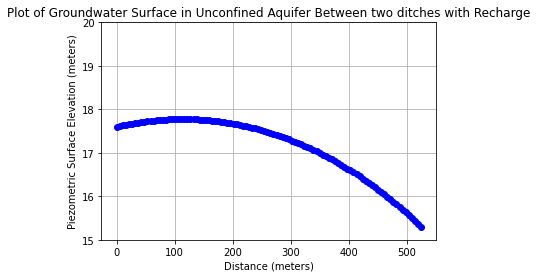

In [110]:
# lists of zeros to store results
xloc = [0 for i in range(100)]
zloc = [hL for i in range(100)]
increment = (xR-xL)/99
for i in range(1,100):
    xloc[i]=xloc[i-1]+increment
    zloc[i]=h(xloc[i],hL,hR,N,K,xL,xR)
stry='Piezometric Surface Elevation (meters)'
strx='Distance (meters)'
strtitle='Plot of Groundwater Surface in Unconfined Aquifer Between two ditches with Recharge' 
from matplotlib import pyplot as plt # import the plotting library from matplotlibplt.show()
plt.plot(xloc, zloc, color ='blue', marker ='o', linestyle ='none')
plt.title(strtitle)# add a title
plt.ylabel(stry)# add a label to the x and y-axes
plt.xlabel(strx)
plt.ylim([15,20])
plt.grid()
plt.show() # display the plot

So the peak is at about x=120.  Now apply the formula to confirm:

In [111]:
L = xR-xL
xstar = (K)/(2*N*L)*(hR**2 - hL**2)+L/2
print("Water Table Divide Location: ",round(xstar,1)," meters from left drain")

Water Table Divide Location:  113.2  meters from left drain


4. The maximum height of the water table.

This is simply the head at xstar

In [112]:
print("Maximum height of water table: ",round(h(xstar,hL,hR,N,K,xL,xR),3)," meters")

Maximum height of water table:  17.775  meters


# Exercise 2-5 

Three monitoring wells exist in an aquifer as shown below. North is upward (toward the top
of the page). The land surface elevations and depths to water are shown below. 

![](http://54.243.252.9/ce-4363-webroot/2-Exercises/ES2/3wellmap.png)

Determine:
1. The magnitude and direction of the head gradient.
<hr>

Solution:

- Use the graphical method in notes
- Use a spreadsheet (Works in LibreOffice if you supress the Macro and don't use the save and exit button) [Model1_Gradient.xls](http://54.243.252.9/ce-4363-webroot/2-Exercises/ES2/src-sol/Model1_Gradient.XLS)
![](GradientLibreOffice.png)
- Solve the equation of the plane through the three wells (Same as the spreadsheet, but using ENGR 1330 methods as shown below)


x-component hydraulic gradient:  0.002
y-component hydraulic gradient:  -0.005
magnitude hydraulic gradient:  0.006
direction cosine x-component hydraulic gradient:  0.29
direction cosine y-component hydraulic gradient:  -0.957


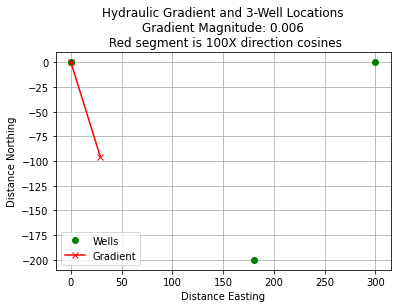

In [113]:
import numpy
import math
# well A is origin
wellID =['Well A','Well B','Well C']
well_X =[0.0,300.0,180.0]
well_Y =[0.0,0.0,-200.0]
well_Z =[3138.5-42.1,3139.2-43.3,3140.0-45.0]
amatrix = [[0 for j in range(3)]for i in range(3)]
b = [0 for j in range(3)]
# A-matrix
for i in range(3):
    amatrix[i][0]=well_X[i]
    amatrix[i][1]=well_Y[i]
    amatrix[i][2]=1.0
    b[i]= well_Z[i] 
amatrix = numpy.array(amatrix) #typecast as numpy array
b = numpy.array(b)
x = numpy.linalg.solve(amatrix,b) # solve equation of plane
# recover and report results
print("x-component hydraulic gradient: ",round(-x[0],3))
print("y-component hydraulic gradient: ",round(-x[1],3))
grad = math.sqrt(x[0]**2+x[1]**2)
print("magnitude hydraulic gradient: ",round(grad,3))
print("direction cosine x-component hydraulic gradient: ",round(-x[0]/grad,3))
print("direction cosine y-component hydraulic gradient: ",round(-x[1]/grad,3))
# use this if want to plot
list1 = [0,-100*x[0]/grad] 
list2 = [0,-100*x[1]/grad] 
stry='Distance Northing'
strx='Distance Easting'
strtitle='Hydraulic Gradient and 3-Well Locations\n'+'Gradient Magnitude: '+ str(round(grad,3)) +'\n Red segment is 100X direction cosines' 

plotlabel=['Wells','Gradient']
from matplotlib import pyplot as plt # import the plotting library from matplotlibplt.show()
plt.plot(well_X, well_Y, color ='green', marker ='o', linestyle ='none') # create a line chart, years on x-axis, gdp on y-axis
plt.plot(list1, list2, color ='red', marker ='x', linestyle ='solid')
plt.title(strtitle)# add a title
plt.ylabel(stry)# add a label to the x and y-axes
plt.xlabel(strx)
plt.legend(plotlabel)
plt.grid()
plt.show() # display the plot